# Hyperparameter Optimization 

Importing the necessary libraries.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Load the dataset

In [26]:
df=pd.read_csv("D:\Dataset\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
df.shape

(569, 33)

In [28]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [29]:
#Checking the target variable
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [30]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [31]:
#Identifying the unique number of values in the dataset
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [32]:
#Checking if there is some null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Drop the Unnamed column and id column since these do not provide any useful information for models.

In [33]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [34]:
#Checking the rows with missing values
df[df.isnull().any(axis=1)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [35]:
#data statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
#Figuring out the correlation between the features
df1 = df.select_dtypes(include=[int,float])
co=df1.corr()
co.shape

(30, 30)

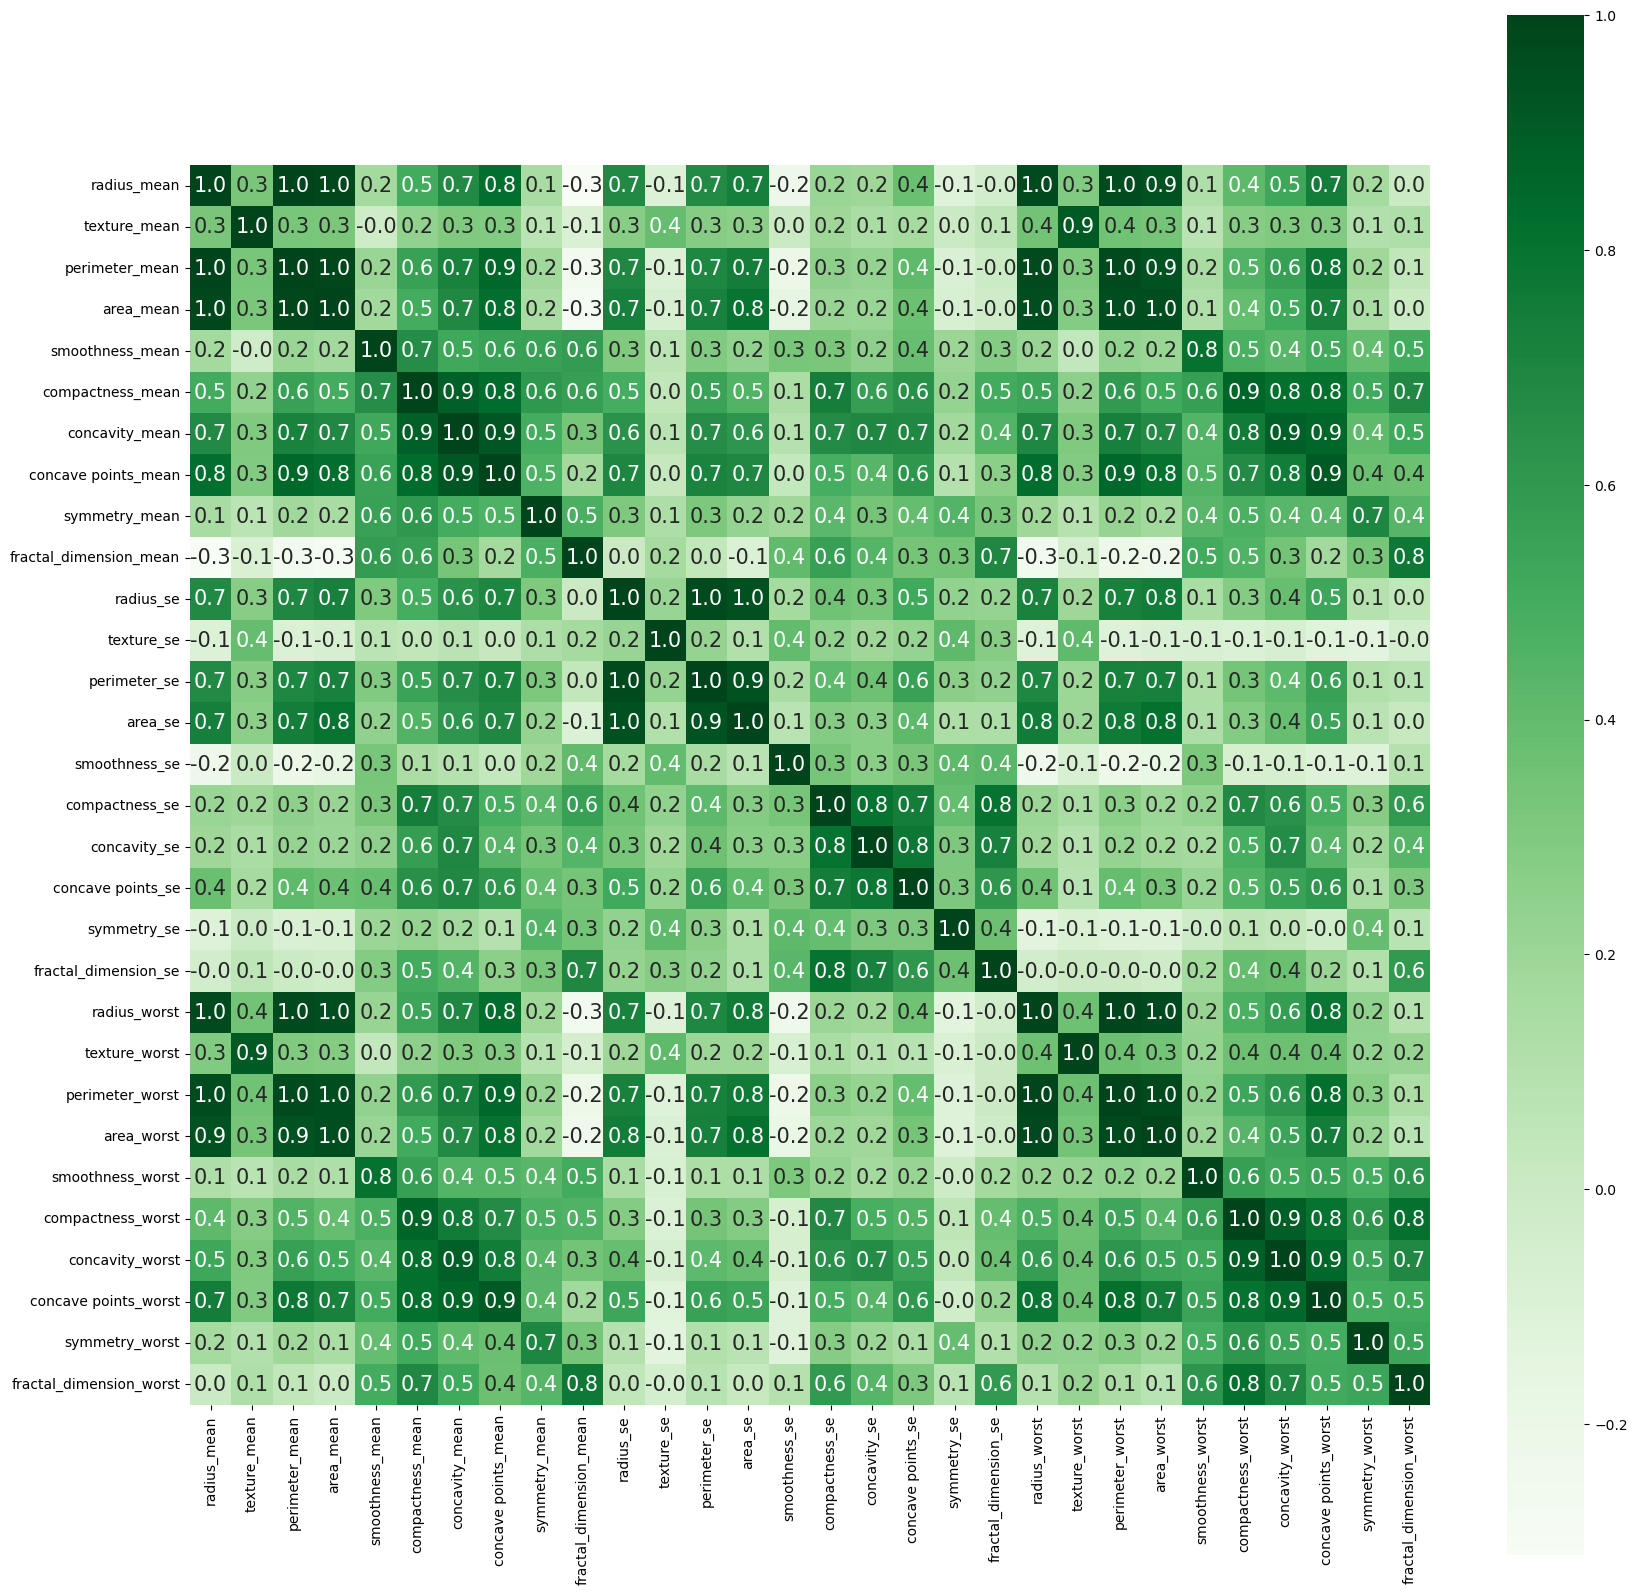

In [37]:
#plotting the heatmaps of correlation
plt.figure(figsize=(20,20))
sns.heatmap(co, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

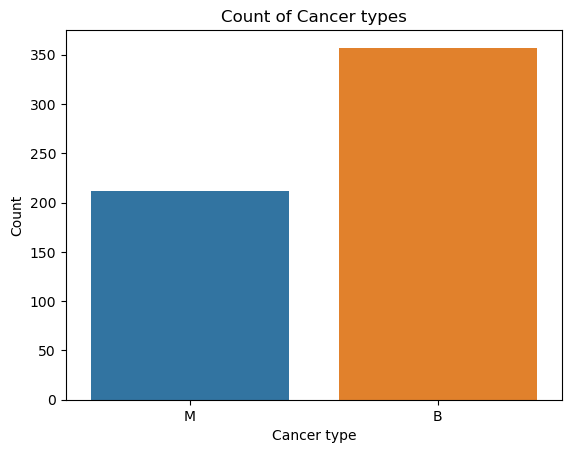

In [53]:
#Study the target variable
plt.title('Count of Cancer types')
sns.countplot(x=df['diagnosis'])
plt.xlabel('Cancer type')
plt.ylabel('Count')
plt.show()
#df.columns

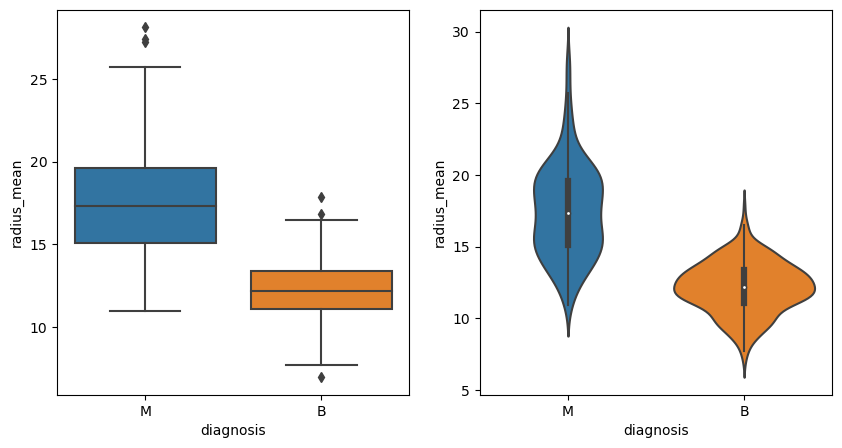

In [60]:
#plotting the correlation between diagnosis and radius 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis",y="radius_mean",data=df)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis",y="radius_mean",data=df)
plt.show()

Boxplot shows us the minimum,first quartile(Q1),median,third quartile(Q3),maximum. It is used for outlier detection.and Violinplot shows the kernel estimate density. 

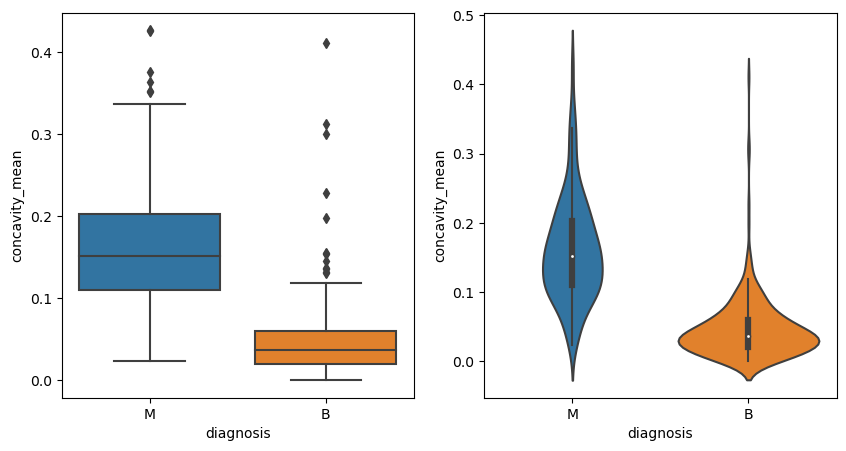

In [68]:
#plotting the correlation between diagnosis and concavity
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='diagnosis',y='concavity_mean',data=df)
plt.subplot(1,2,2)
sns.violinplot(x='diagnosis',y='concavity_mean',data=df)
plt.show()

C:\Users\prata\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


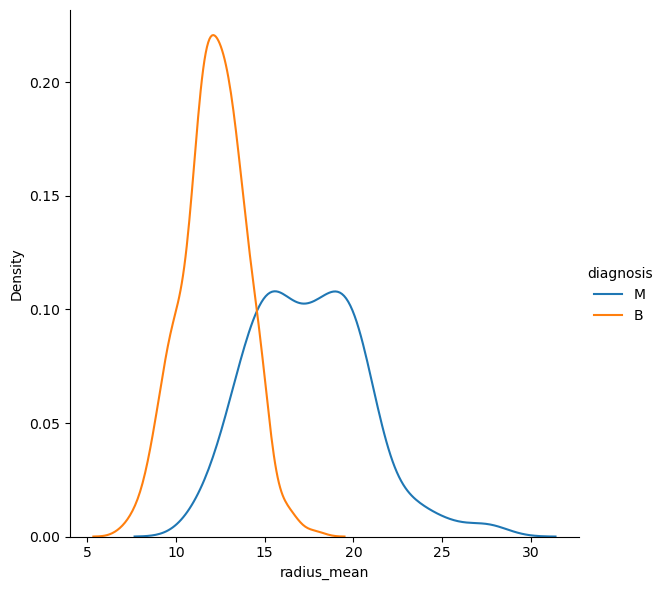

In [70]:
#Distribution density plot
sns.FacetGrid(df,hue='diagnosis',height=6).map(sns.kdeplot,'radius_mean').add_legend()
plt.show()

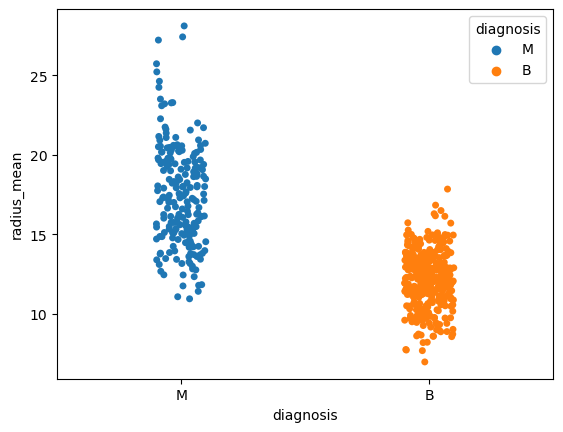

In [93]:
#plot the distribution of a single variable distinctly
sns.stripplot(x="diagnosis",y="radius_mean",data=df,jitter=True,hue="diagnosis",edgecolor="gray")
plt.show()

C:\Users\prata\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


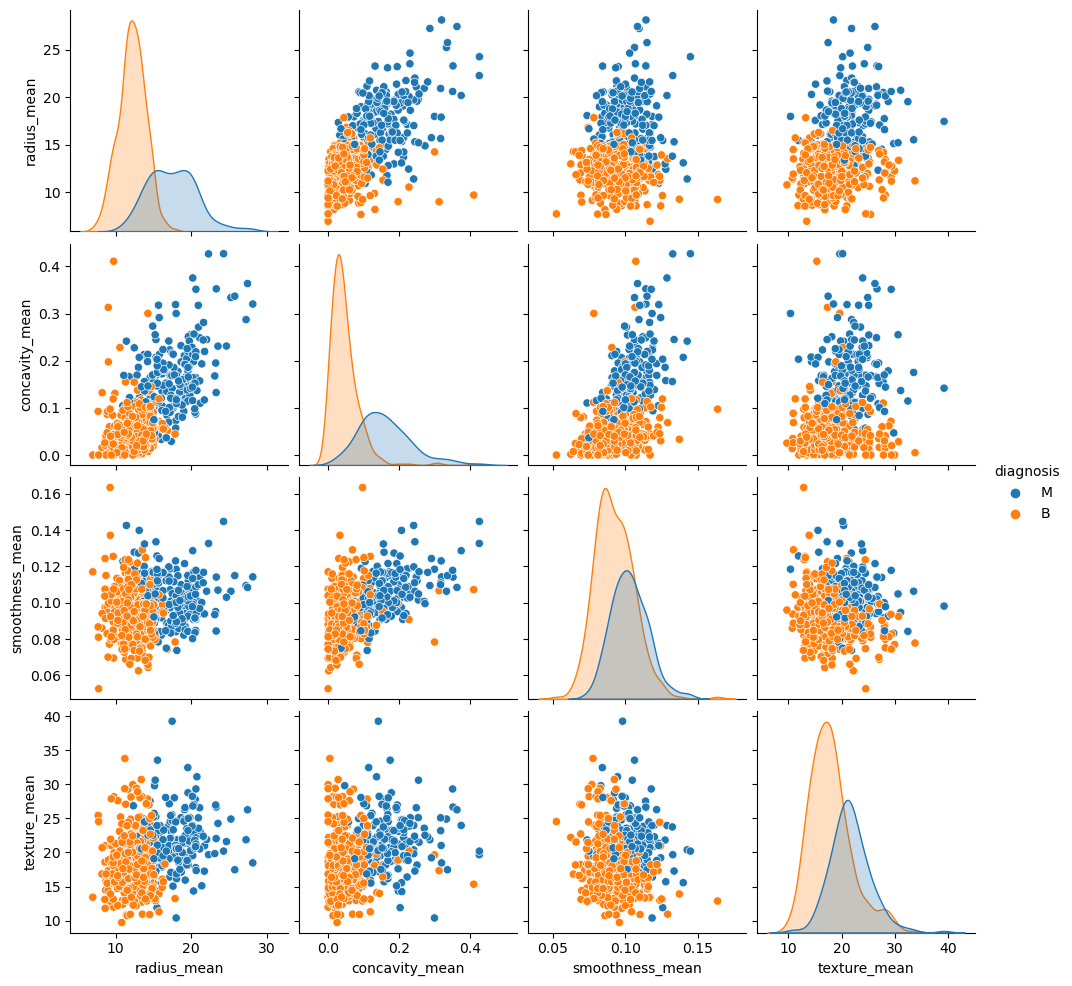

In [95]:
#plotting bivariate relations between each pair of features based on diagnosis
sns.pairplot(df,hue="diagnosis",vars=["radius_mean","concavity_mean","smoothness_mean","texture_mean"])
plt.show()

We split the dataset into training set and testing set for our machine learning problem for suitable proportion. 

In [99]:
#Selecting the target and independent variable
x=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"]

In [103]:
#Dividing the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("Size of training set:",X_train.shape)
print("Size of testing set:",X_test.shape)

Size of training set: (398, 30)
Size of testing set: (171, 30)


Logistic Regression

In [117]:
#Logistic Regression
#import libray
from sklearn.linear_model import LogisticRegression
#Create a Logistic regression classifier
logreg=LogisticRegression(max_iter=2500)
#Train the model using training set
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=2500)

In [113]:
#Prediction of test data
y_pred=logreg.predict(X_test)

In [114]:
acc_logreg=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of Logistic Regression model:' , acc_logreg)

Accuracy of Logistic Regression model: 95.91


Gaussian Naive Bayes

In [118]:
#importing libray for naive bayes
from sklearn.naive_bayes import GaussianNB
#create a gaussian classifier
model=GaussianNB()
#Train the model
model.fit(X_train,y_train)

GaussianNB()

In [119]:
y_pred=model.predict(X_test)

In [120]:
acc_nb=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accracy of Gaussian Naive Bayes model:' ,acc_nb)

Accracy of Gaussian Naive Bayes model: 92.4


Decision Tree

In [121]:
# Decision Tree Classifier
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

Hyperparameter optimization using GridSearchCV in scikit-learn - 
1. Start by identifying the hyperparameters that have the most significant impact on my model's performance. For example, for K-Nearest Neighbors (KNN), the number of neighbors (n_neighbors) is crucial. For Random Forest, the number of estimators (n_estimators) is important.
2. Create a dictionary where keys are hyperparameter names, and values are lists of values to try. This defines the grid of parameters that GridSearchCV will search over.
3. Create an object of the GridSearchCV class and assign the parameters to it.
4. Fit the GridSearchCV object on my training data (X_train, y_train).
5. We will get the best parameters from the bestestimator property of the object.
6. Finally, use the best estimator returned by GridSearchCV to make predictions on new data or further evaluate its performance.

In [125]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }
# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_
# Train the model using the training sets 
clf.fit(X_train, y_train)

C:\Users\prata\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prata\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prata\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\prata\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\prata\anaconda3\Lib\site-packa

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=3)

In [123]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [124]:
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  87.13


Random Forest


In [128]:
# Random Forest Classifier
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }
# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_
# Train the model using the training sets 
rf.fit(X_train,y_train)

C:\Users\prata\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prata\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prata\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\prata\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\prata\anaconda3\Lib\site-pac

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=15)

In [131]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [132]:
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  97.66


Support Vector Machine

In [133]:
# SVM Classifier
# Create a that to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
# Import Library of SVM
from sklearn import svm
# Support Vector Classifier
svc = svm.SVC()
# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_
# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [135]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [136]:
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  98.25


K-Nearest Neighbors

In [148]:
# K - Nearest Neighbors
# Import library
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn = KNeighborsClassifier()
# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 40, 50]
             }
# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_
# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [146]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [147]:
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  95.91


In [149]:
#Comparision of models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,98.25
3,Random Forest,97.66
0,Logistic Regression,95.91
5,K - Nearest Neighbors,95.91
1,Naive Bayes,92.40
2,Decision Tree,87.13


From the above table SVM classifier works best for the dataset.